In [1]:
import warnings
warnings.filterwarnings("ignore")

[[255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 ...
 [121 119 131 255]
 [155 153 162 255]
 [222 221 224 255]]
(425104, 4)


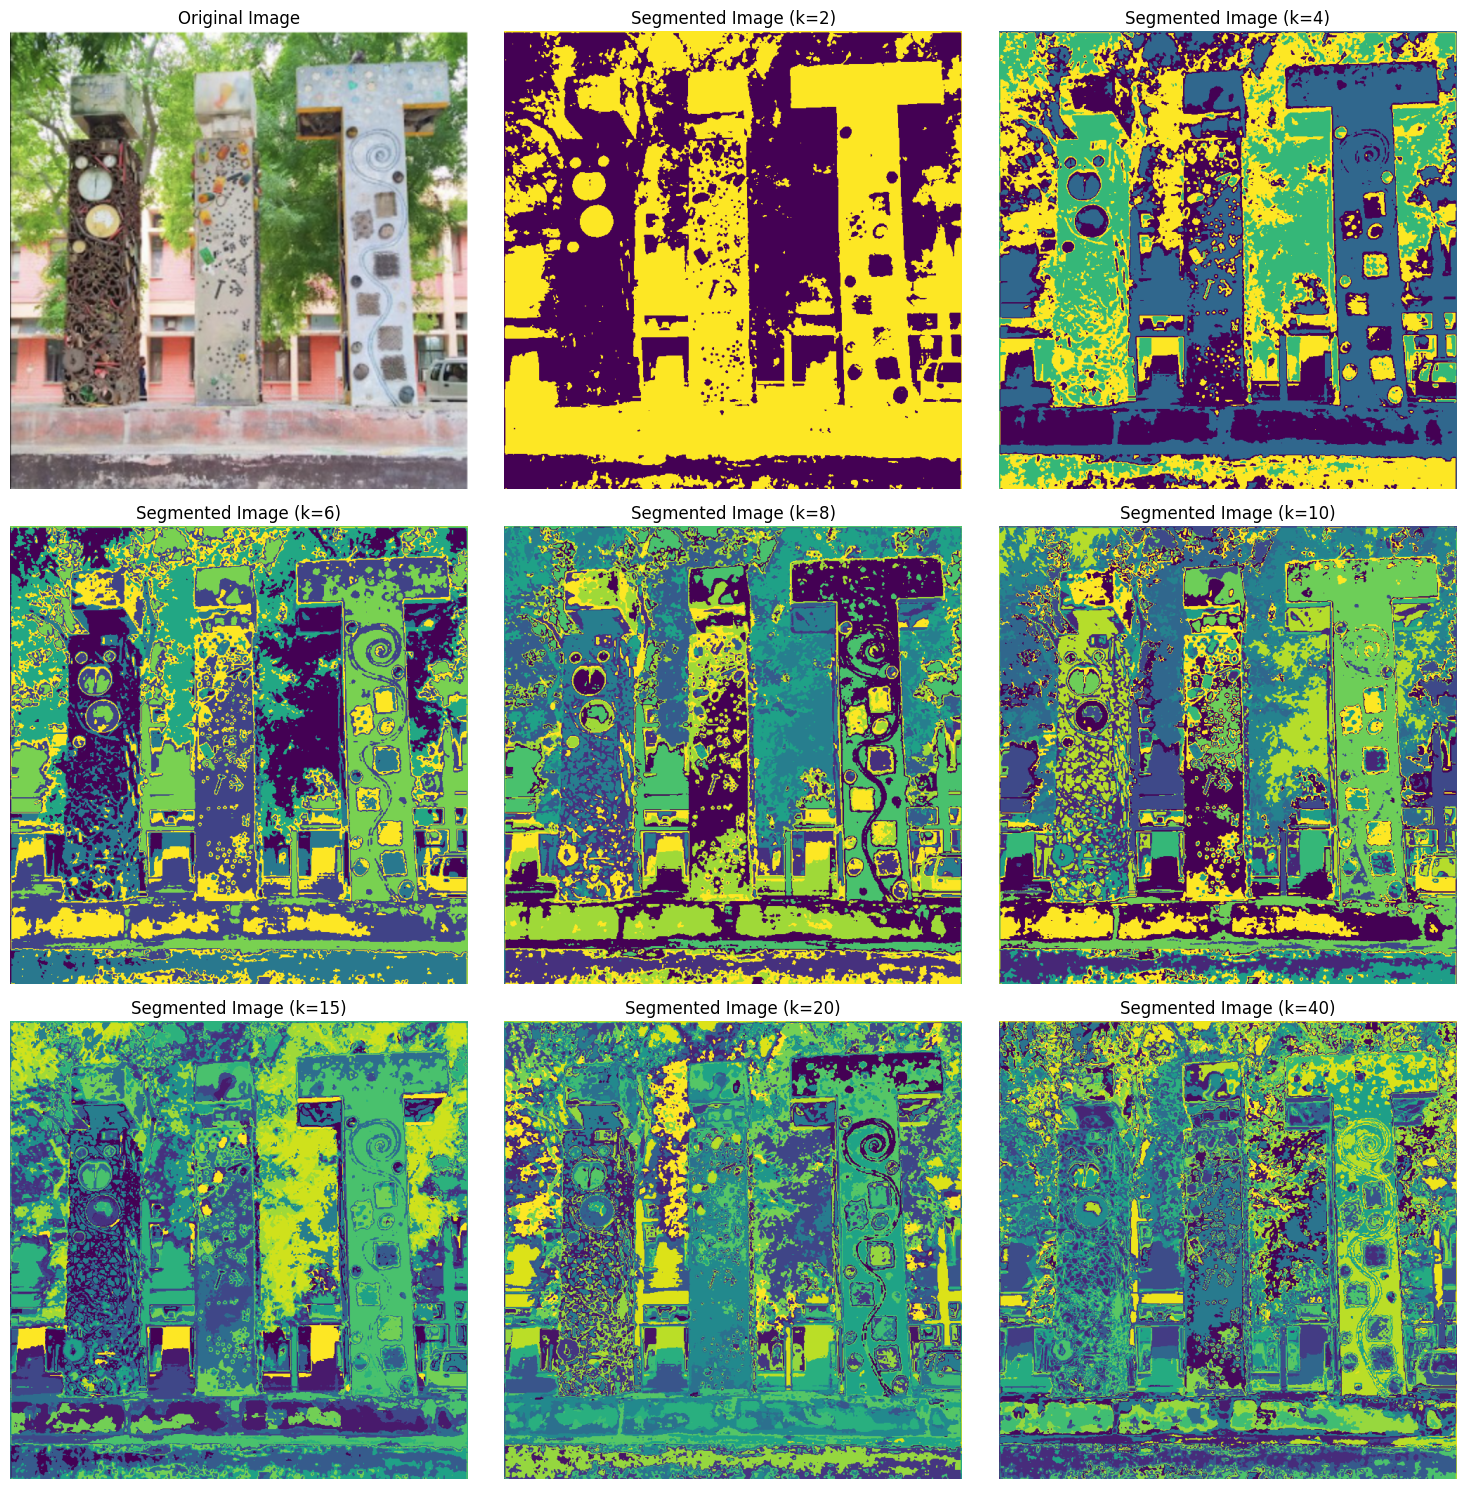

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io

def segment_image(image_path, cluster_numbers):
    # Load image
    image = io.imread(image_path)

    # Reshape image to 2D array
    height, width, _ = image.shape
    image_2d = image.reshape(height * width, -1)
    print(image_2d)
    print(image_2d.shape)

    fig, axes = plt.subplots(3, 3, figsize=(15, 15))

    # Display original image
    axes[0, 0].imshow(image)
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')

    # Perform k-means clustering and display segmented images
    for i, k in enumerate(cluster_numbers):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(image_2d)
        segmented_image = kmeans.labels_
        # print(labels)
        # segmented_image = kmeans.cluster_centers_[labels]
        segmented_image = segmented_image.reshape(height, width, -1).astype(np.uint8)

        row = (i + 1) // 3
        col = (i + 1) % 3
        axes[row, col].imshow(segmented_image)
        axes[row, col].set_title(f'Segmented Image (k={k})')
        axes[row, col].axis('off')


    plt.tight_layout()
    plt.show()

# Example usage
image_path = '/content/IITD image.jpg'
cluster_numbers = [2, 4, 6, 8, 10, 15, 20, 40]  # Specify the desired cluster numbers

segment_image(image_path, cluster_numbers)


# **Silhouette Score**

The silhouette score is a metric used to evaluate the quality of clustering in unsupervised learning. It measures how well-separated clusters are and quantifies the similarity of data points within a cluster compared to other clusters.

The silhouette score is computed for each data point and ranges from -1 to +1:

- A score close to +1 indicates that the data point is well-clustered and far away from neighboring clusters.
- A score close to 0 indicates that the data point is on or very close to the decision boundary between two neighboring clusters.
- A score close to -1 indicates that the data point may have been assigned to the wrong cluster, and it would be better suited in a different cluster.

The silhouette score takes into account both the cohesion (average distance between a data point and other points within the same cluster) and separation (average distance between a data point and the points in the nearest neighboring cluster). Higher silhouette scores indicate better-defined and well-separated clusters.


## Importance of Data Normalization

Data normalization is a critical preprocessing step in machine learning and data analysis. It involves transforming the features of the dataset to a standardized scale, typically with a mean of 0 and a standard deviation of 1. Normalization is essential for several reasons:

1. **Equalizing Feature Scales:** Many machine learning algorithms, such as K-Means, Support Vector Machines (SVM), and Neural Networks, use distance-based calculations to make decisions. Features with larger scales can dominate the learning process, leading to biased results. By normalizing the features, we ensure that all features contribute equally to the model.

2. **Faster Convergence:** Normalization can lead to faster convergence during the training of iterative algorithms. When features have vastly different scales, it may take longer for the optimization algorithm to converge to the optimal solution.

3. **Gradient Descent Optimization:** Gradient-based optimization algorithms, like Gradient Descent, perform better when features are on the same scale. This is because the learning rate affects the step size during optimization, and balancing the scales helps the algorithm take appropriate steps in all directions.

4. **Regularization:** Regularization techniques like L1 and L2 regularization are sensitive to the scale of the features. Normalization ensures that regularization terms impact all features equally.

5. **Avoiding Numerical Issues:** Some algorithms may experience numerical instability or convergence issues if the input data is not scaled properly. Normalization reduces the risk of such issues.

6. **Interpretability:** Normalization can improve the interpretability of the model's coefficients or feature importances, as the effects of each feature become comparable.

Overall, normalization helps to make the data more suitable for various machine learning algorithms, improves their performance, and ensures that the algorithms work effectively and efficiently. It is an essential preprocessing step that can significantly impact the success of the machine learning models.


In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans, SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import kneighbors_graph
import matplotlib.pyplot as plt

# Generate synthetic data with 6 blobs for clustering comparison
data, _ = make_blobs(n_samples=300, centers=5, cluster_std=1.0, random_state=42)

# data, _ = make_moons(n_samples=1000, noise=0.1, random_state=42)

# Add some noise to the data
noise = np.random.uniform(low=-5, high=5, size=(50, 2))
data_with_noise = np.vstack([data, noise])
# true_labels_with_noise = np.concatenate([true_labels, [-1]*50])  # Assign label -1 to noise points

# Plot the data before normalization
# plt.scatter(data_with_noise[:, 0], data_with_noise[:, 1], c=true_labels_with_noise, cmap='rainbow')
plt.scatter(data_with_noise[:, 0], data_with_noise[:, 1], cmap='rainbow')
plt.show()

# Normalize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

# Helper function to evaluate clustering with different distance functions
def evaluate_clustering(clustering_model, distance_function, method_name):
    clustering_labels = clustering_model.fit_predict(data_normalized)
    silhouette_avg = silhouette_score(data_normalized, clustering_labels)
    print(f"Silhouette Score (Distance Function: {distance_function}) for {method_name}: {silhouette_avg:.4f}")

    # Visualize the clustering results
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=clustering_labels, s=50, cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'{method_name} Clustering')
    plt.grid(True)
    plt.show()


# DBSCAN
print("\nDBSCAN with Different Distance Functions:")
for distance in ['euclidean', 'manhattan']:
    print(f"Distance Function: {distance}")
    dbscan_clustering = DBSCAN(eps=0.3, min_samples=5, metric=distance)
    evaluate_clustering(dbscan_clustering, distance, 'DBSCAN')

# K-Means
print("\nK-Means with Different Distance Functions:")
for distance in ['euclidean', 'manhattan', 'cosine']:
    print(f"Distance Function: {distance}")
    kmeans_clustering = KMeans(n_clusters=6, init='k-means++', n_init=10, random_state=42)
    evaluate_clustering(kmeans_clustering, distance, 'K-Means')


KeyboardInterrupt: 